In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [4]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/archive/diabetes.csv")

# Display the first few rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# split the data into features(x) and target(y)
x = df.drop("Outcome", axis=1)
y = df["Outcome"]

# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)


In [8]:
# initiliaze and train the decision tree
clf = DecisionTreeClassifier(criterion = "entropy", max_depth = 3, random_state=42)
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [9]:
# make predictions
y_pred = clf.predict(x_test)

In [11]:
# eavluate the model
# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the decision tree is : {accuracy:.2f}")

Accuracy of the decision tree is : 0.77


In [14]:
# confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

Confusion matrix:
[[83 16]
 [20 35]]


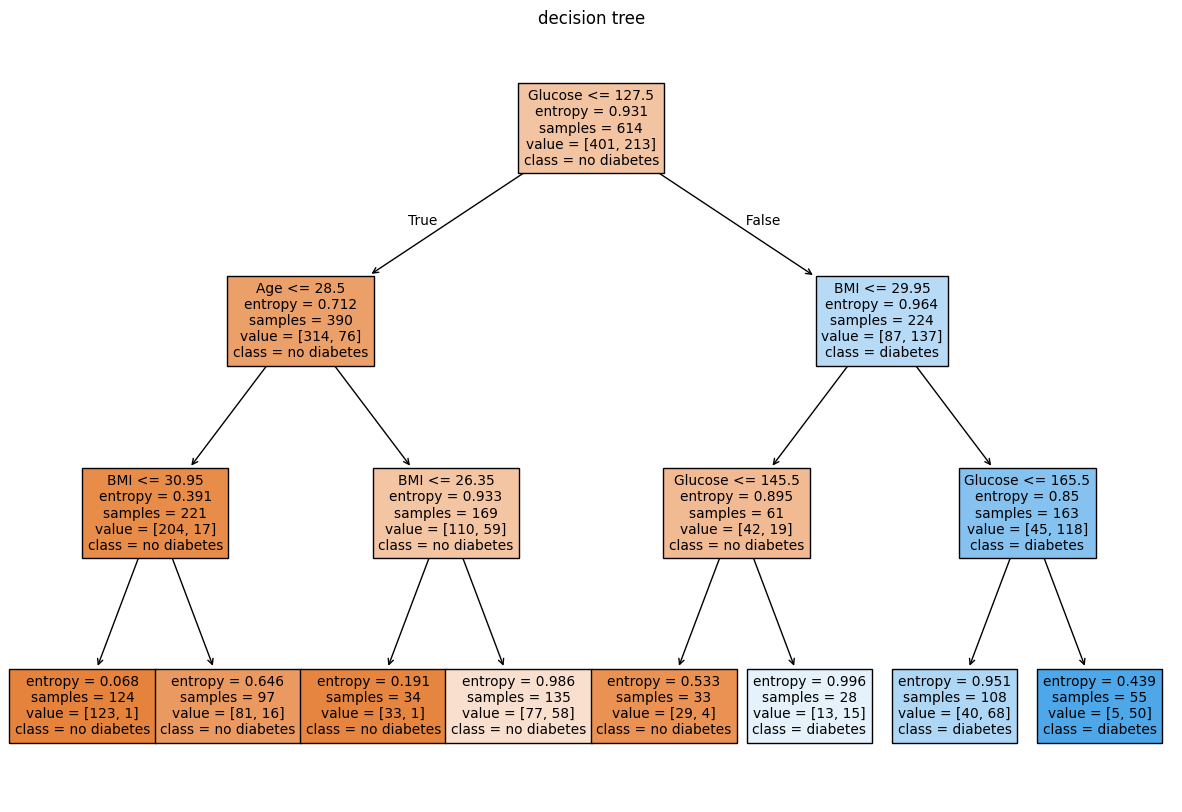

In [15]:
# visualize the confusion matrix
plt.figure(figsize=(15,10))
plot_tree(clf, feature_names=x.columns, class_names=["no diabetes", "diabetes"], filled=True)
plt.title("decision tree")
plt.show()

In [16]:
# display tree rules as text
tree_rules = export_text(clf, feature_names=list(x.columns))
print("decision tree rules")
print(tree_rules)

decision tree rules
|--- Glucose <= 127.50
|   |--- Age <= 28.50
|   |   |--- BMI <= 30.95
|   |   |   |--- class: 0
|   |   |--- BMI >  30.95
|   |   |   |--- class: 0
|   |--- Age >  28.50
|   |   |--- BMI <= 26.35
|   |   |   |--- class: 0
|   |   |--- BMI >  26.35
|   |   |   |--- class: 0
|--- Glucose >  127.50
|   |--- BMI <= 29.95
|   |   |--- Glucose <= 145.50
|   |   |   |--- class: 0
|   |   |--- Glucose >  145.50
|   |   |   |--- class: 1
|   |--- BMI >  29.95
|   |   |--- Glucose <= 165.50
|   |   |   |--- class: 1
|   |   |--- Glucose >  165.50
|   |   |   |--- class: 1



**Grid Search CV**

In [17]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# define the parameter grid
param_grid = {
    'criterion' : ['gini', 'entropy']
    'max_depth' : [3, 5, 7, 10, None]
}